In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import numpy as np
import pathlib
import os
import itertools


In [2]:
plant_names = [
    "Acacia mearnsii",
    "Antigonon leptopus",
    "Arundo donax",
    "Cabomba furcata",
    "Chromolaena odorata",
    "Ipomoea cairica",
    "Lantana camara",
    "Mikania micrantha",
    "Mimosa diplotricha",
    "Parthenium hysterophorus",
    "Pistia stratiotes",
    "Prosopis juliflora",
    "Salvinia molesta",
    "Senna spectabilis",
    "Sphagneticola trilobata",
    "Pontederia crassipes",
]


In [3]:
model_path = pathlib.Path(
    r"C:\Users\zuraj\Downloads\MiniProjectNew\Programs\Deployed Api\Saved models\model1.h5"
)
model = tf.keras.models.load_model(model_path, compile=False)

## Testing model using random images


In [4]:
image_dir_path = pathlib.Path(r"C:\Users\zuraj\Downloads\Test_image")
image_path = os.path.join(image_dir_path, os.listdir(image_dir_path)[0])
image_path


'C:\\Users\\zuraj\\Downloads\\Test_image\\image.jpg'

1/1 [==============================] - 3s 3s/step


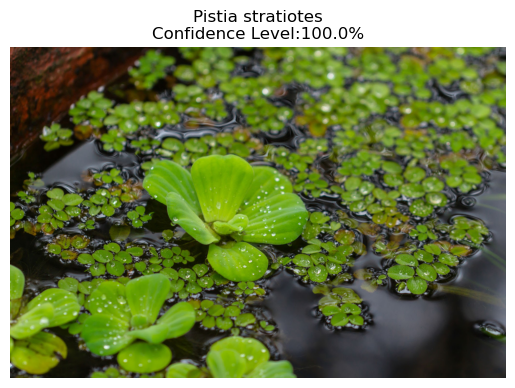

In [5]:
raw_image = mimage.imread(image_path)

input_image = tf.image.resize(raw_image, (256, 256))
input_image = np.reshape(input_image.numpy(), (1, 256, 256, 3))

prediction = model.predict(input_image)
pred_label = np.argmax(prediction[0])

plt.imshow(raw_image)
plt.title(
    f"{plant_names[pred_label]}\nConfidence Level:{prediction[0][pred_label]*100}%"
)
plt.axis(False)
plt.show()


## Plotting confusion matrix using sample from full data


In [6]:
images_path = pathlib.Path(r"C:\Users\zuraj\Downloads\MiniProjectNew\Dataset")

n_samples = 100

full_data = image_dataset_from_directory(
    images_path,
    labels="inferred",
    batch_size=n_samples,
    seed=32,
    class_names=plant_names,
)

Found 17694 files belonging to 16 classes.


In [7]:
tf.data.experimental.cardinality(full_data)


<tf.Tensor: shape=(), dtype=int64, numpy=177>

In [8]:
data, labels = next(iter(full_data))
predictions = np.argmax(model.predict(data), axis=1)


4/4 [==============================] - 4s 1s/step


In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, predictions)


In [10]:
cm


array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [11]:
def plot_confusion_matrix(cm, classes, title="Confusion matrix", cmap=plt.cm.Reds):
    plt.figure(figsize=(30, 30), dpi=500)

    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title, fontsize=25)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = ".2f"
    cm = cm * 100
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
            fontsize=14,
        )

    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.show()

In [19]:
plot_confusion_matrix(cm, plant_names)
